<a href="https://colab.research.google.com/github/1070rahul/1070rahul/blob/main/Electric_Vehicle_Marker_Size_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Electric Vehicle Market Size Analysis
                                        
    Dated - 9/4/2024



# Introduction
- Electric vehicles (EVs) represent a significant shift in the automotive industry, driven by the need for sustainable transportation solutions.
- Market Size Analysis is the process of estimating the potential sales for a product or service within a particular market segment.
- In the context of electric vehicles (EVs), it involves assessing the total volume of EV registrations to understand the growth of the market, forecast future trends, and help stakeholders make informed decisions regarding production, infrastructure development, and policy-making.
- This project aims to analyze the EV market's size, exploring various factors that influence its growth and potential.

# Aim of the Project
The main goal of this study is to use past data on electric vehicle (EV) registrations to figure out how common EVs are now, predict how much they will grow in the market, and spot the main trends and driving forces behind this growth. The specific objectives are to:

- Look at the past increase in EV registrations.
- Predict the number of future EV registrations using past patterns.
- Examine how EV registrations vary by model, brand, and location.
- Calculate the expected size and expansion potential of the EV market in the coming years.
- Offer valuable insights to help those involved in making decisions about manufacturing, planning for EV charging infrastructure, and creating policies.

# Dataset Description
The provided dataset contains the following columns, each representing different aspects of the electric vehicle (EV) population in the United States:

1. VIN (1-10): Partial Vehicle Identification Number.
2. County: The county in which the vehicle is registered.
3. City: The city in which the vehicle is registered.
4. State: The state in which the vehicle is registered. It appears that this dataset may be focused on Washington (WA) state.
5. Postal Code: The postal code where the vehicle is registered.
6. Model Year: The year of the vehicle model.
7. Make: The manufacturer of the vehicle.
8. Model: The model of the vehicle.
9. Electric Vehicle Type: The type of electric vehicle, e.g., Battery Electric Vehicle (BEV).
10. Clean Alternative Fuel Vehicle (CAFV) Eligibility: Eligibility status for clean alternative fuel vehicle programs.
11. Electric Range: The maximum range of the vehicle on a single charge (in miles).
12. Base MSRP: The Manufacturer’s Suggested Retail Price.
13. Legislative District: The legislative district where the vehicle is registered.
14. DOL Vehicle ID: Department of Licensing Vehicle Identification.
15. Vehicle Location: Geographic coordinates of the vehicle location.
16. Electric Utility: The electric utility service provider for the vehicle’s location.
17. 2020 Census Tract: The census tract for the vehicle’s location.

# Methodology
- Data Collection
- Data Preprocessing
- Exploratory Data Analysis (EDA)
- Visualization.

In [ ]:
import zipfile

In [ ]:
zip_ref = zipfile.ZipFile('/content/EV-data.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading dataset
ev_df = pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')

In [ ]:
ev_df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


# Data Cleaning

In [ ]:
ev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

## Observation:
There are some missing values in the dataset

In [ ]:
# checking missing values
ev_df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [ ]:
# drop missing values
ev_df = ev_df.dropna()

In [ ]:
ev_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177473 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177473 non-null  object 
 1   County                                             177473 non-null  object 
 2   City                                               177473 non-null  object 
 3   State                                              177473 non-null  object 
 4   Postal Code                                        177473 non-null  float64
 5   Model Year                                         177473 non-null  int64  
 6   Make                                               177473 non-null  object 
 7   Model                                              177473 non-null  object 
 8   Electric Vehicle Type                              177473 non-null  object 
 9 

# Let's explore some areas for EV market analysis:
1. EV Adoption Over Time: Analyze the growth of the EV population by model year.
2. Geographical Distribution: Understand where EVs are most commonly registered (e.g., by county or city).
3. EV Types: Breakdown of the dataset by electric vehicle type (BEV, etc.).
3. Make and Model Popularity: Identify the most popular makes and models among the registered EVs.
4. Electric Range Analysis: Analyze the electric range of vehicles to see how EV technology is progressing.
5. Estimated Growth in Market Size: Analyze and find the estimated growth in the market size of electric vehicles.

# 1. EV Adoption Over Time:

In [ ]:
ev_df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

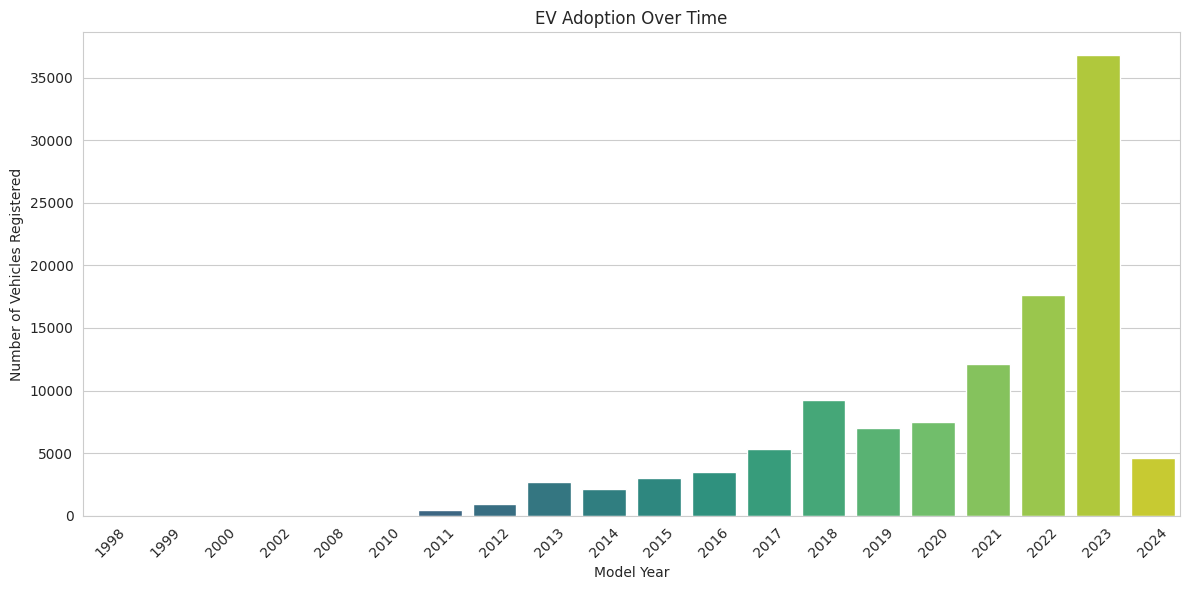

In [ ]:
# visualizing ev adoption over time
plt.figure(figsize = (12,6))
ev_adoption_by_year = ev_df['Model Year'].value_counts().sort_index()
sns.barplot(x = ev_adoption_by_year.index, y = ev_adoption_by_year.values, palette = 'viridis')
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

## Observation:
1. From the bar chart, It is clear that adoption has increased over time.
2. The year 2023 has shown particularly sharp increase in the number of EV registrations.

#  Geographical Distribution:

##### Let's select top 5 counties based on Ev registrations and then analyze the distribution of Ev within the cities of those counties.

In [ ]:
ev_df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [ ]:
# geographical distribution based on county level.
ev_county = ev_df['County'].value_counts()

In [ ]:
top_counties = ev_county.head(5).index
top_counties

Index(['King', 'Snohomish', 'Clark', 'Thurston', 'Kitsap'], dtype='object', name='County')

In [ ]:
# filtering the dataset for these top counties
top_counties_data = ev_df[ev_df['County'].isin(top_counties)]
top_counties_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,37.0,125701579.0,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,1.0,244285107.0,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270.0,0.0,36.0,156773144.0,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210.0,0.0,5.0,165103011.0,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,23.0,205138552.0,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [ ]:
# analyzing the distribution of EVs within the cities of these top counties
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')
ev_city_distribution_top_counties


,County,City,Number of Vehicles
0,King,Seattle,23371
1,King,Bellevue,7599
2,Clark,Vancouver,5173
3,King,Kirkland,4447
4,King,Sammamish,4261
...,...,...,...
94,Snohomish,Index,2
95,King,Snoqualmie Pass,2
96,King,Baring,1
97,Thurston,Bucoda,1


In [ ]:
# visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)

In [ ]:
top_cities

,County,City,Number of Vehicles
0,King,Seattle,23371
1,King,Bellevue,7599
2,Clark,Vancouver,5173
3,King,Kirkland,4447
4,King,Sammamish,4261
5,King,Redmond,4164
6,King,Renton,4156
7,Thurston,Olympia,3113
8,King,Tukwila,2602
9,Snohomish,Bothell,2536


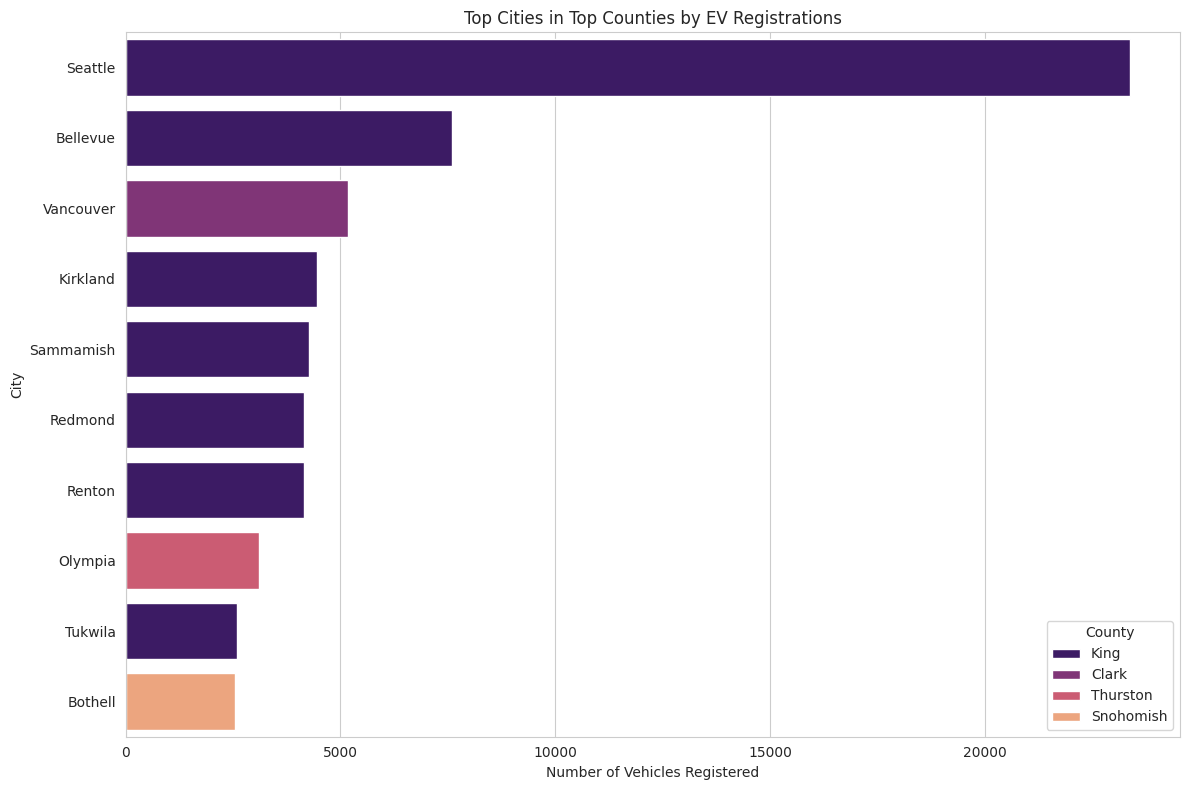

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="magma")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

## Observation:
1. The above graph tells the number of EV's registered in various cities within three counties: King, Snohomish, and Pierce.
2. Seattle, which is in King County, has the highest number of EV registrations.
3. Overall, the graph indicates that EV adoption is not uniform across the cities and is more concentrated in King County.

#  3. EV Types

In [ ]:
ev_df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [ ]:
# analyzing the distribution of electric vehicle Types
ev_type_distribution = ev_df['Electric Vehicle Type'].value_counts()


In [ ]:
ev_type_distribution

Electric Vehicle Type
Battery Electric Vehicle (BEV)            88989
Plug-in Hybrid Electric Vehicle (PHEV)    24058
Battery Electric Vehicle (BEV                 1
Name: count, dtype: int64

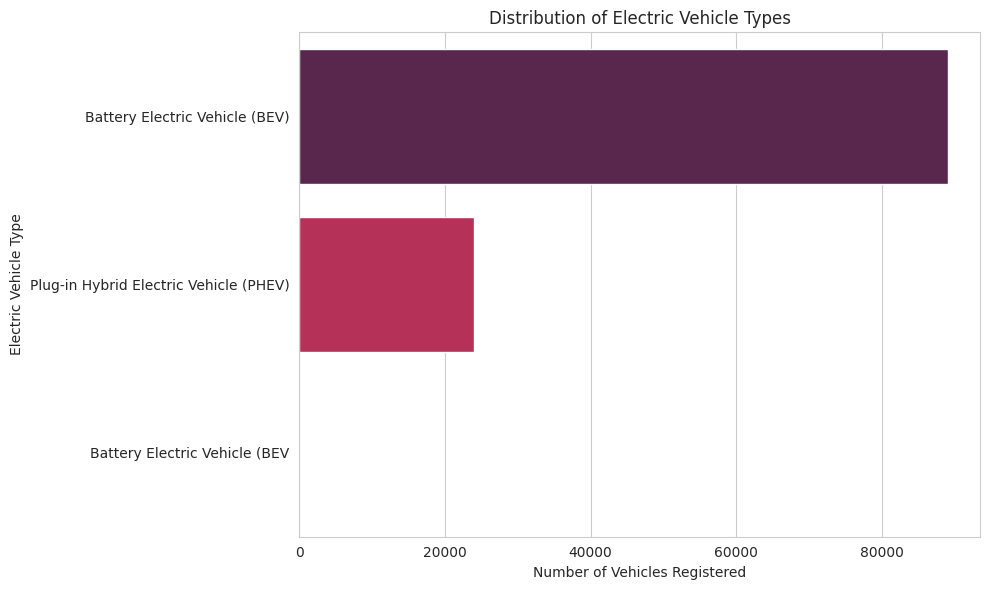

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket")
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

## Observation:
The above graph shows that BEVs are more popular or preferred over PHEVs among the electric vehicles registered in the United States.

# 4. Make and Model Popularity

In [ ]:
ev_df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [ ]:
# analyzing the popularity of EV manufacturers
ev_make_distribution = ev_df['Make'].value_counts().head(10)  # Limiting to top 10 for clarity

In [ ]:
ev_make_distribution.head()

Make
TESLA        51080
NISSAN        8965
CHEVROLET     8495
FORD          5258
BMW           4924
Name: count, dtype: int64

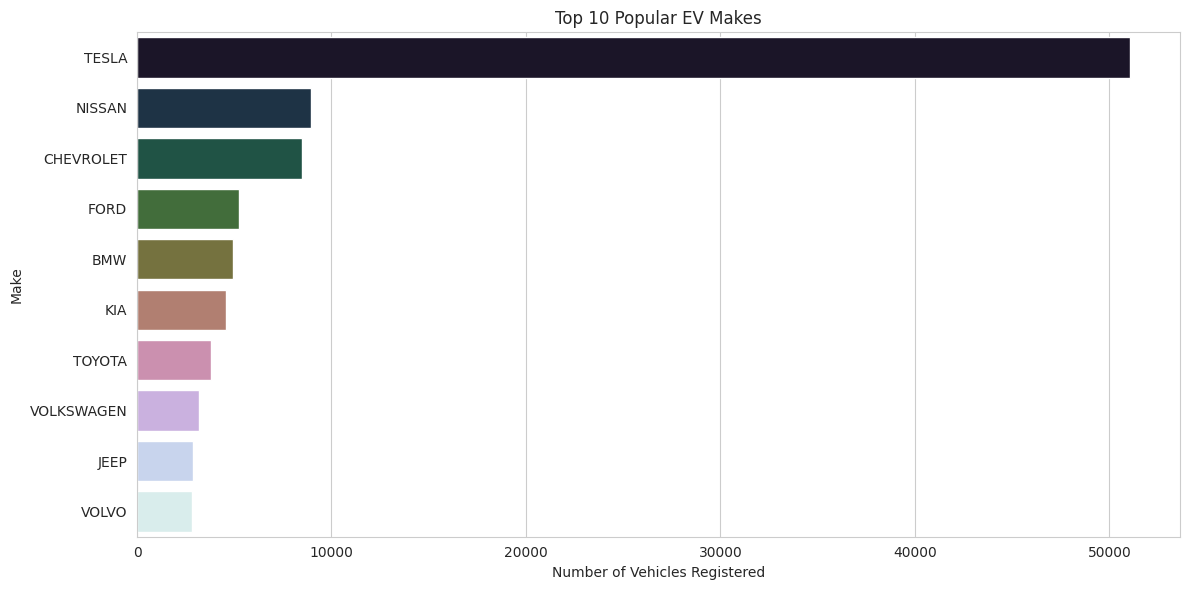

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix")
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

# Observation:
1. Tesla tops the list.
2. NISSAN is the second most popular manufacturer, followed by CHEVROLET, though both have significantly fewer registrations than TESLA.

### Let’s see the most popular models within these top manufacturers

In [ ]:
# selecting the top 3 manufacturers based on the number of vehicles registered
top_3_makes = ev_make_distribution.head(3).index

# filtering the dataset for these top manufacturers
top_makes_data = ev_df[ev_df['Make'].isin(top_3_makes)]

# analyzing the popularity of EV models within these top manufacturers
ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualizing the top 10 models across these manufacturers for clarity
top_models = ev_model_distribution_top_makes.head(10)

In [ ]:
top_models

,Make,Model,Number of Vehicles
0,TESLA,MODEL Y,23043
1,TESLA,MODEL 3,19292
2,NISSAN,LEAF,8621
3,TESLA,MODEL S,4935
4,CHEVROLET,BOLT EV,4416
5,TESLA,MODEL X,3779
6,CHEVROLET,VOLT,2691
7,CHEVROLET,BOLT EUV,1203
8,NISSAN,ARIYA,344
9,CHEVROLET,SPARK,152


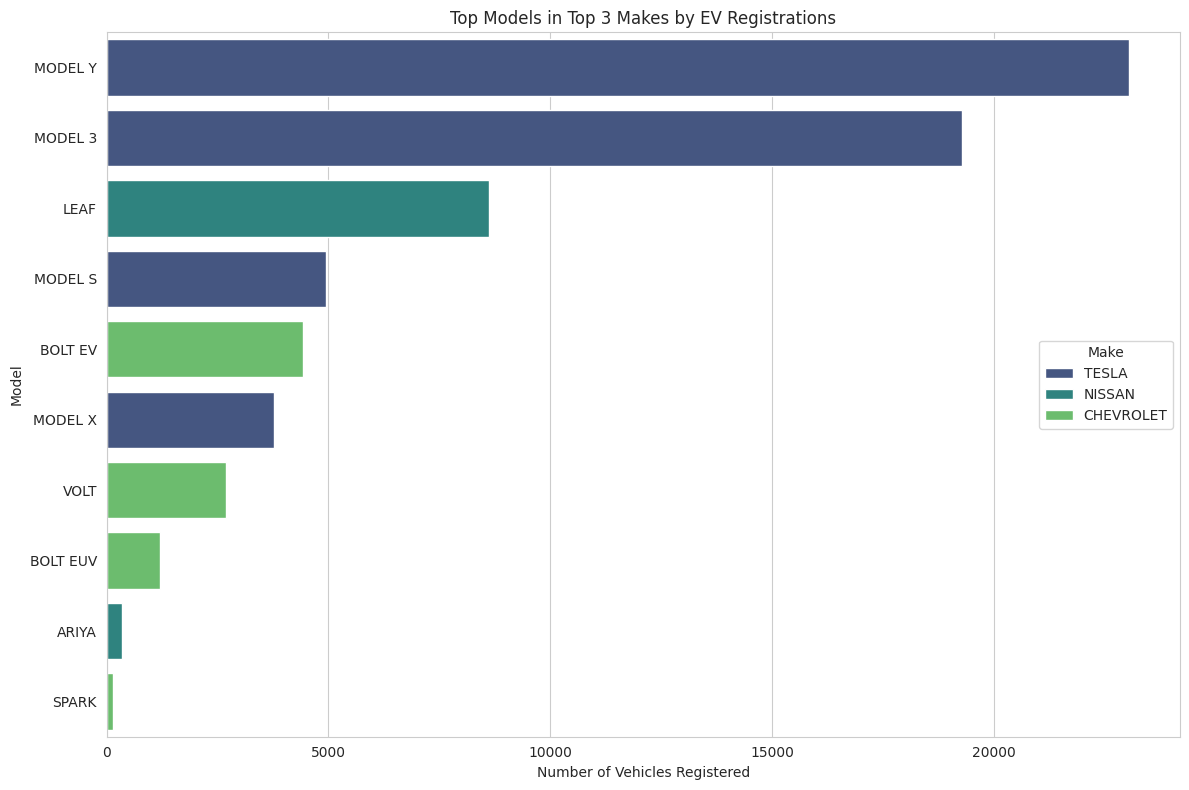

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="viridis")
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

# Observation:
1. Tesla's Model Y and Model 3 are the most registered vehicles.

# 5. Electric Range Analysis

In [ ]:
ev_df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

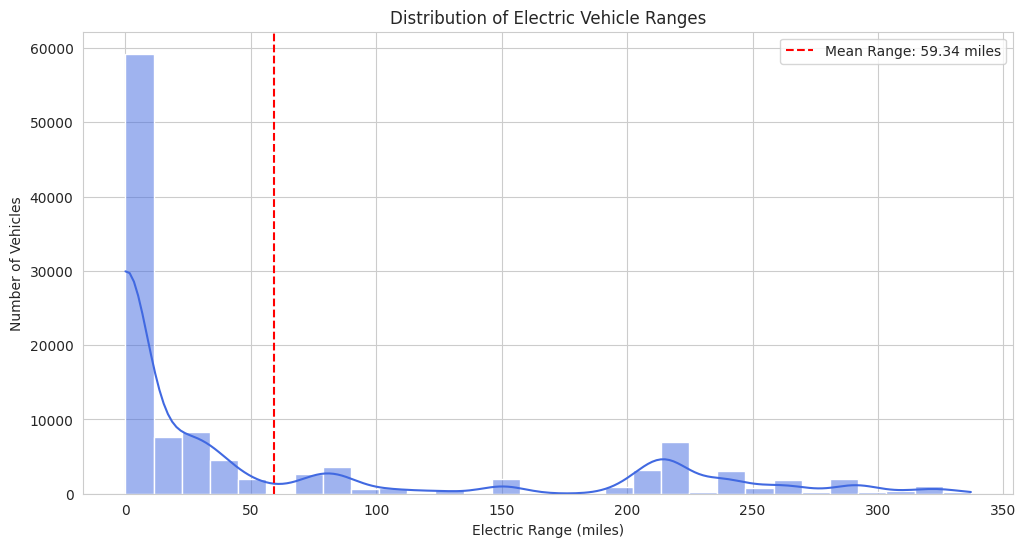

In [ ]:
# analyzing the distribution of electric range
plt.figure(figsize=(12, 6))
sns.histplot(ev_df['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_df['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {ev_df["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

# Observation:
The above graph shows the mean electric range.

1. There is a high frequency of vehicles with a low electric range, with a significant peak occurring just before 50 miles.
2. The distribution is skewed to the right, with a long tail extending towards higher ranges, although the number of vehicles with higher ranges is much less frequent.
3. Despite the presence of electric vehicles with ranges that extend up to around 350 miles, the majority of the vehicles have a range below the mean.

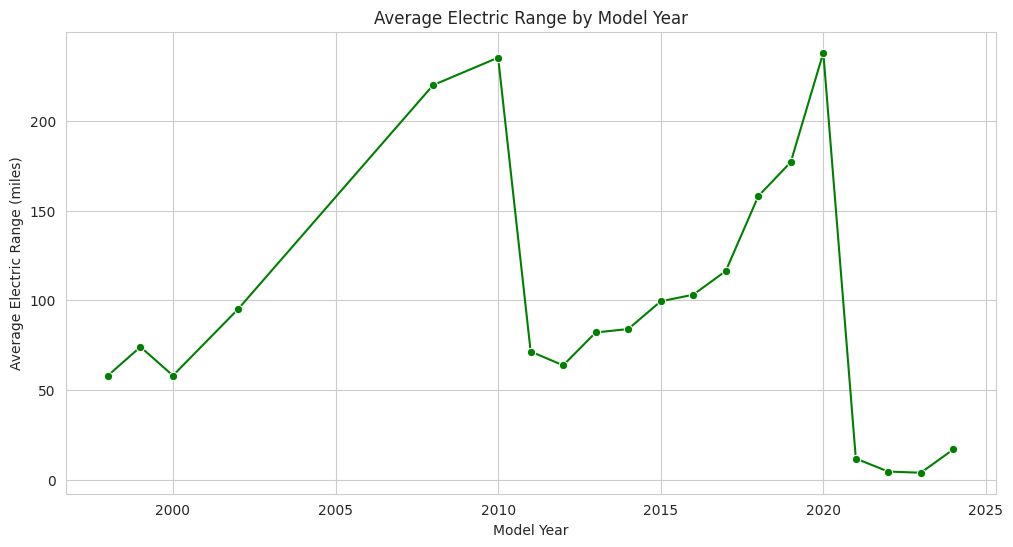

In [ ]:
# calculating the average electric range by model year
average_range_by_year = ev_df.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

# Observations:
1. There is an upward trend in the average electric range of EVs over the years, indicating improvements in technology and battery efficiency.
2. There is a noticable peak around the year 2020.
3. After 2020 significant drop in the average range, which could indicate that data for the following years might be incomplete or reflect the introduction of several lower-range models.

### Let’s explore how electric ranges vary among the top manufacturers and models

In [ ]:
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()
# the top 10 models with the highest average electric range
top_range_models = average_range_by_model.head(10)
top_range_models

,Make,Model,Electric Range
0,TESLA,ROADSTER,235.322581
1,TESLA,MODEL S,178.548936
2,CHEVROLET,BOLT EV,150.672781
3,TESLA,MODEL X,136.074888
4,TESLA,MODEL 3,110.156231
5,NISSAN,LEAF,83.998724
6,CHEVROLET,SPARK,82.000000
7,CHEVROLET,VOLT,45.429208
8,TESLA,MODEL Y,19.119646
9,CHEVROLET,BLAZER EV,0.000000


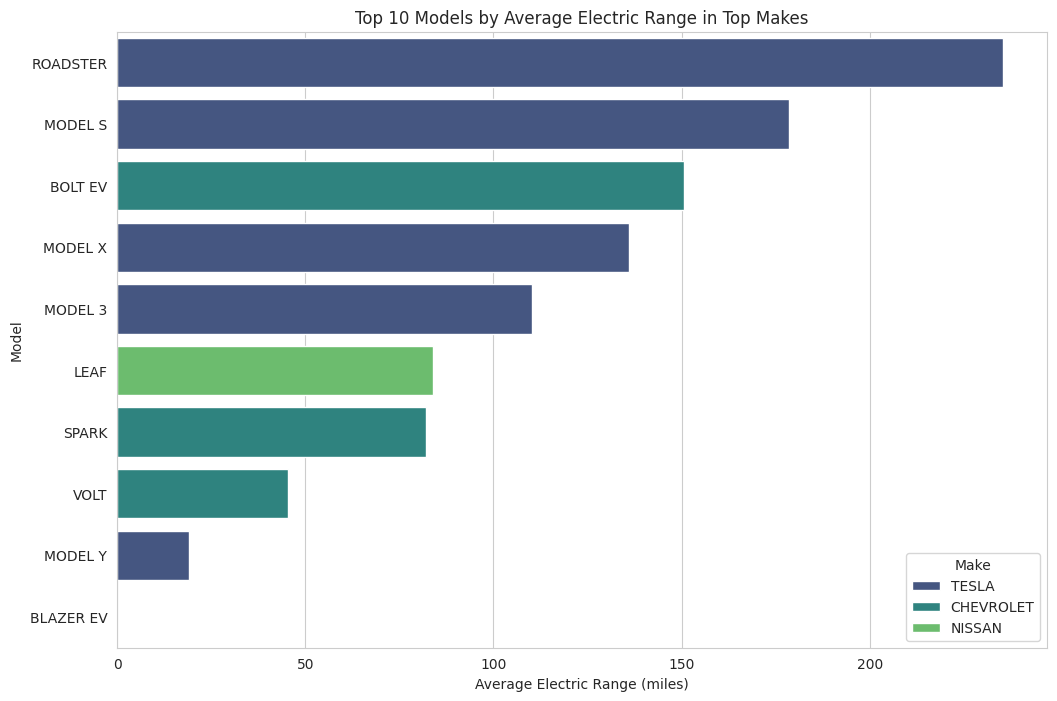

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="viridis")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.show()

# Observation:
The TESLA ROADSTER has the highest average electric range among the models listed.

# 6. Estimated Growth in Market Size

In [ ]:
# calculate the number of EVs registered each year
ev_registration_counts = ev_df['Model Year'].value_counts().sort_index()
ev_registration_counts

Model Year
1998        1
1999        1
2000        4
2002        1
2008       12
2010       15
2011      480
2012      972
2013     2657
2014     2142
2015     3031
2016     3503
2017     5355
2018     9225
2019     7008
2020     7500
2021    12126
2022    17655
2023    36779
2024     4581
Name: count, dtype: int64

1. In 2021, there were 12126 EVs registered.
2. In 2022, the number increased to 17655 EVs.
3. In 2023, a significant jump to  36779 EVs was observed.
4. For 2024, currently, 4581 EVs are registered, which suggests partial data.

To forecast the total number of EVs expected to be registered in 2024, we can use a growth rate based approach from previous complete years.

In [47]:
from scipy.optimize import curve_fit
import numpy as np
# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{2024: 50653.718793265594, 2025: 76769.83461197071, 2026: 116350.93427993052, 2027: 176339.31317212715, 2028: 267256.5851100458, 2029: 405049.1124175077}


## Now, let’s plot the estimated market size data:

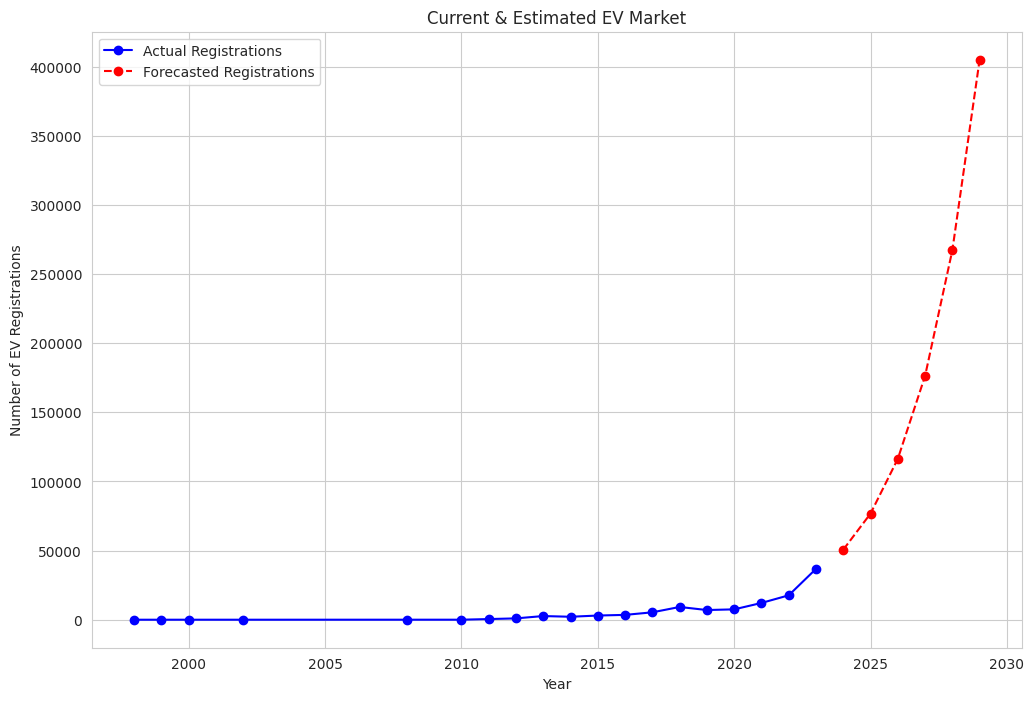

In [48]:
# prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()

# Conclusion:
From the above graph, we can tell:
1. The forecasted EV registrations predict an even more dramatic increase in the near future, with the number of registrations expected to rise sharply in the coming years.
2. we can conclude that the EV market size is expected to expand considerably.